### IDs:
Insert yours IDs to the cell below

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom, nbinom, moment, rv_discrete, geom
import matplotlib.pyplot as plt
from math import log, ceil

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

Denote $p$ the probability of finding at least one defective product, $q$ as the probability of not finding any defective product in a single sample ($q=1-defective rate = 1 - 0.03 = 0.97$) and $n$ as the number of independent samples.
The complement probability formula is given by: $p=1-q^n$. 
We want $p$ to be at least $0.85$, so the formula for $n$ is given by: $n = \frac{log(1-p)}{log(q)}$   
  

In [3]:
def calc_samples_for_probability(desired_probability, defective_rate):
    ### This function gets the probability to have defective product (defective_rate = 1-q) 
    ### and the probability to fined at least one defective product (desired_probability = p)
    ### return the number of sample to have probability p to fined one defective product
    q = 1- defective_rate
    return ceil((log(1-desired_probability)/log(q)))

print(f'The number of samples we should ask is: {calc_samples_for_probability(0.85, 0.03)}')

The number of samples we should ask is: 63


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [4]:
print(f'The number of samples we should ask is: {calc_samples_for_probability(0.95, 0.04)}')

The number of samples we should ask is: 74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

We identified negative binomial distribution on the non-defective products. We built a function using nbinom.ppf function on the non-defective products. Then we add the number of defective product that we are looking for.

In [4]:
Q1_C_1 = ceil(nbinom.ppf(q=0.9, n=5, p=0.1)) + 5
Q1_C_2 = ceil(nbinom.ppf(q=0.9, n=15, p=0.3)) + 15
print("The number of samples for Q1_C_1 is:",Q1_C_1) 
print("The number of samples for Q1_C_2 is:",Q1_C_2) 

The number of samples for Q1_C_1 is: 78
The number of samples for Q1_C_2 is: 64


Although the mean of both is the same ($E(X_1)=\frac{n}{p}=\frac{5}{0.1}=50, E(X_2)=\frac{15}{0.3 } = 5$), the variance of each result is different. We will visualize which one of the distributions reaches its number of defectives products 'faster': X1 or X2 using Negative Binomial Distribution and Cumulative distribution function.

E(X1)= 50.0, Var(X1) = 450.0
E(X2)= 50.0, Var(X2) = 116.7


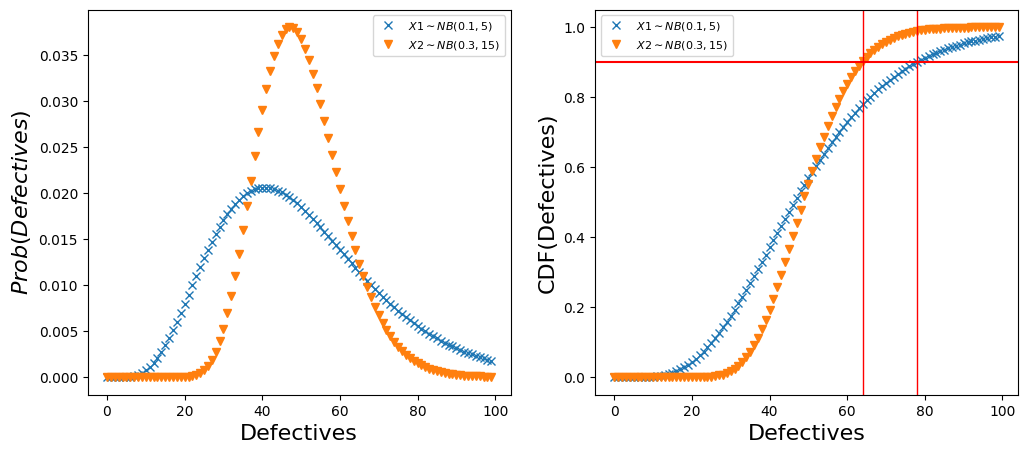

In [5]:
r = 5
p = 0.1
m = 3

X_1 = nbinom(r, p, loc=r)
X_2 = nbinom(r*m, p*m, loc=r*m)

i = range(0, int(np.round(2*r/p,0)))

p_X1 = X_1.pmf([xx for xx in i])
p_X2 = X_2.pmf([xx for xx in i])

cdf_X1 = X_1.cdf([xx for xx in i])
cdf_X2 = X_2.cdf([xx for xx in i])


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(i,p_X1,'x',label="$X1\sim NB({{{0}}},{{{1}}})$".format(p, r))
plt.plot(i,p_X2,'v',label="$X2\sim NB({{{0}}},{{{1}}})$".format(round(p*m,2), r*m))
plt.xlabel('Defectives', fontsize=16)
plt.ylabel('$Prob(Defectives)$', fontsize=16)
plt.legend(fontsize=8)

plt.subplot(1,2,2)
plt.plot(i,cdf_X1, 'x',label="$X1\sim NB({{{0}}},{{{1}}})$".format(p, r))
plt.plot(i,cdf_X2,'v',label="$X2\sim NB({{{0}}},{{{1}}})$".format(round(p*m,2), r*m))
plt.axhline(y= 0.9, color='r')
plt.axvline(x= 64, linewidth=1, color='r')
plt.axvline(x= 78, linewidth=1, color='r')
plt.xlabel("Defectives", fontsize = 16)
plt.ylabel("CDF(Defectives)", fontsize = 16)
plt.legend(fontsize=8)

mean_X1,var_X1 = nbinom.stats(r,p,loc=r)
mean_X2,var_X2 = nbinom.stats(r*m,p*m,loc=r*m)
print(f'E(X1)= {round(mean_X1,1)}, Var(X1) = {round(var_X1,1)}')
print(f'E(X2)= {round(mean_X2,1)}, Var(X2) = {round(var_X2,1)}')


P(X1>X2) [0.4515138,0.4523985]


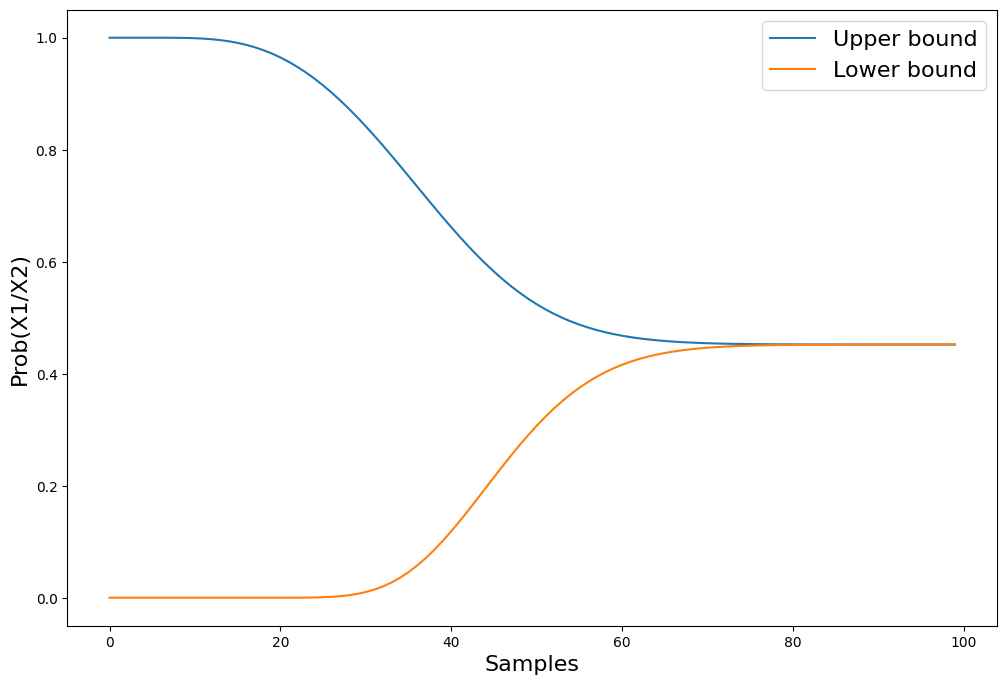

In [6]:
upper_bound = []
lower_bound = []
for i in range(0, 100):
    sum_up=0
    sum_down=0
    for j in range(r, i):
        sum_up+=X_1.pmf(j)*(1-X_2.cdf(j-1))  
    for j in range(r*m, i):
        sum_down += X_2.pmf(j)*(1-X_1.cdf(j))
    upper_bound.append(1-sum_up)
    lower_bound.append(sum_down)

plt.figure(figsize=(12,8))
plt.plot(range(0, 100), upper_bound,label='Upper bound')
plt.plot(range(0, 100),lower_bound,label='Lower bound')
plt.xlabel("Samples", fontsize = 16)
plt.ylabel("Prob(X1/X2)", fontsize = 16)
plt.legend(fontsize=16)
print("P(X1>X2) [{},{}]".format(round(lower_bound[80],7),round(upper_bound[80],7)))

As we see in the graph, after around 70 samples the lines are closed. The probability that X1>X2 is lower than 0.5, Thus X2 is more likely to reach 15 defectives before X1 reaches 5 defectives.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

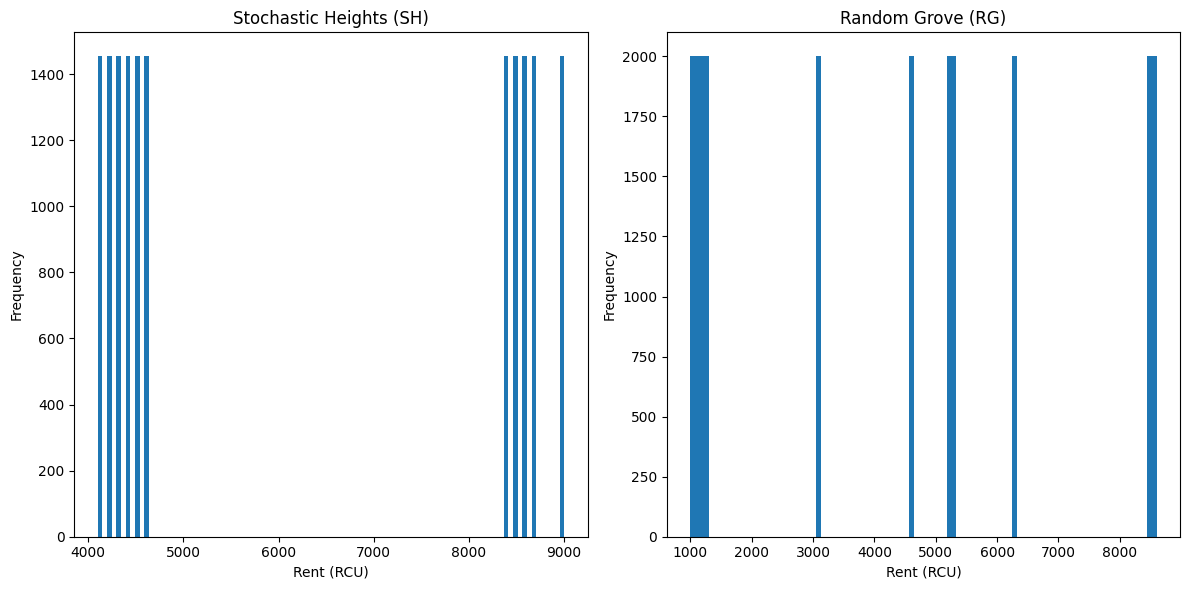

The median of  Stochastic Heights is: 4600.0. The mean is: 6300.0. The IRQ is:4300.0
The median of  Random Grove is: 4600.0. The mean is: 4200.0. The IRQ is:5100.0


In [7]:
population_sh = 16000
population_rg = 22000
#mean_rent_sh = 6300
#mean_rent_rg = 4200
#median_rent_sh = 4600
#median_rent_rg = 4600

n_bins=100


# Generate synthetic data for Scenario 1
sh1_prices = np.array([4100,4200,4300,4400,4500,4600,8400,8500,8600,8700,9000]*int(population_sh/11))
rg1_prices = np.array([1000,1100,1200,1300,3100,4600,5200,5300,6300,8500,8600]*int(population_rg/11))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sh1_prices, bins=n_bins)
plt.title('Stochastic Heights (SH)')
plt.xlabel('Rent (RCU)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(rg1_prices, bins=n_bins)
plt.title('Random Grove (RG)')
plt.xlabel('Rent (RCU)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Q3,Q1=np.percentile(sh1_prices,(75,25))
sh1_iqr = Q3-Q1
Q3,Q1=np.percentile(rg1_prices,(75,25))
rg1_iqr = Q3-Q1

print(f'The median of  Stochastic Heights is: {np.median(sh1_prices)}. The mean is: {np.mean(sh1_prices)}. The IRQ is:{sh1_iqr}')
print(f'The median of  Random Grove is: {np.median(rg1_prices)}. The mean is: {np.mean(rg1_prices)}. The IRQ is:{rg1_iqr}')

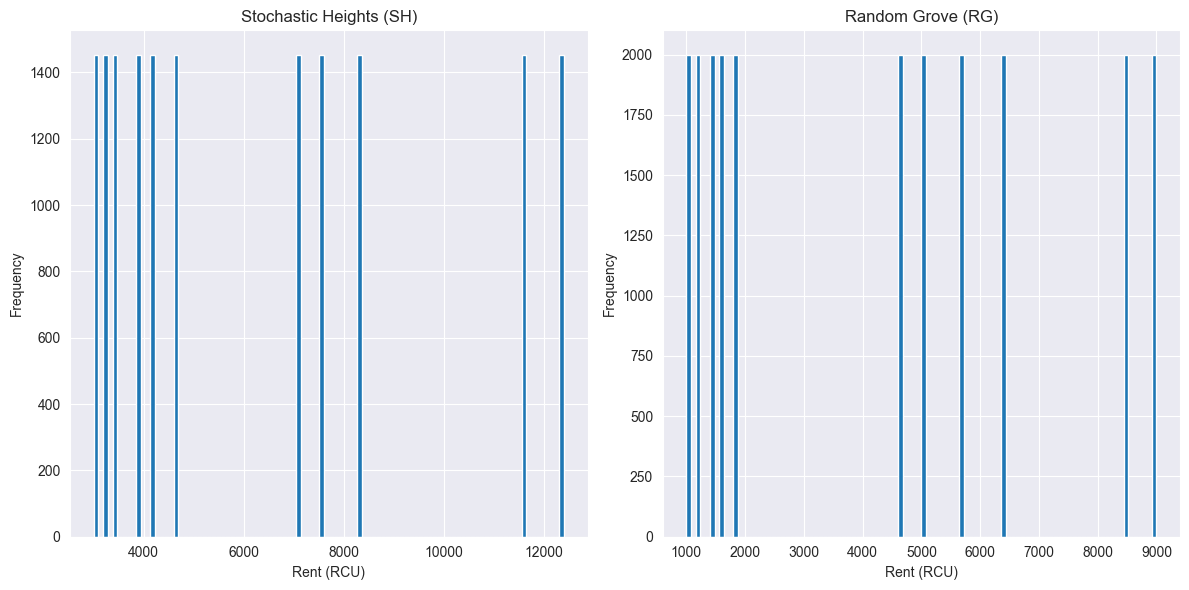

The median of  Stochastic Heights is: 4600.0. The mean is: 6300.0. The IRQ is:4900.0
The median of  Random Grove is: 4600.0. The mean is: 4200.0. The IRQ is:5000.0


In [9]:
# Generate synthetic data for Scenario 2
sh2_prices = np.array([3000,3200,3400,3900,4200,4600,7100,7600,8300,11600,12400]*int(population_sh/11))
rg2_prices = np.array([1000,1200,1400,1600,1800,4600,5000,5700,6400,8500,9000]*int(population_rg/11))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sh2_prices, bins=n_bins)
plt.title('Stochastic Heights (SH)')
plt.xlabel('Rent (RCU)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(rg2_prices, bins=n_bins)
plt.title('Random Grove (RG)')
plt.xlabel('Rent (RCU)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Q3,Q1=np.percentile(sh2_prices,(75,25))
sh2_iqr = Q3-Q1
Q3,Q1=np.percentile(rg2_prices,(75,25))
rg2_iqr = Q3-Q1

print(f'The median of  Stochastic Heights is: {np.median(sh2_prices)}. The mean is: {np.mean(sh2_prices)}. The IRQ is:{sh2_iqr}')
print(f'The median of  Random Grove is: {np.median(rg2_prices)}. The mean is: {np.mean(rg2_prices)}. The IRQ is:{rg2_iqr}')

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

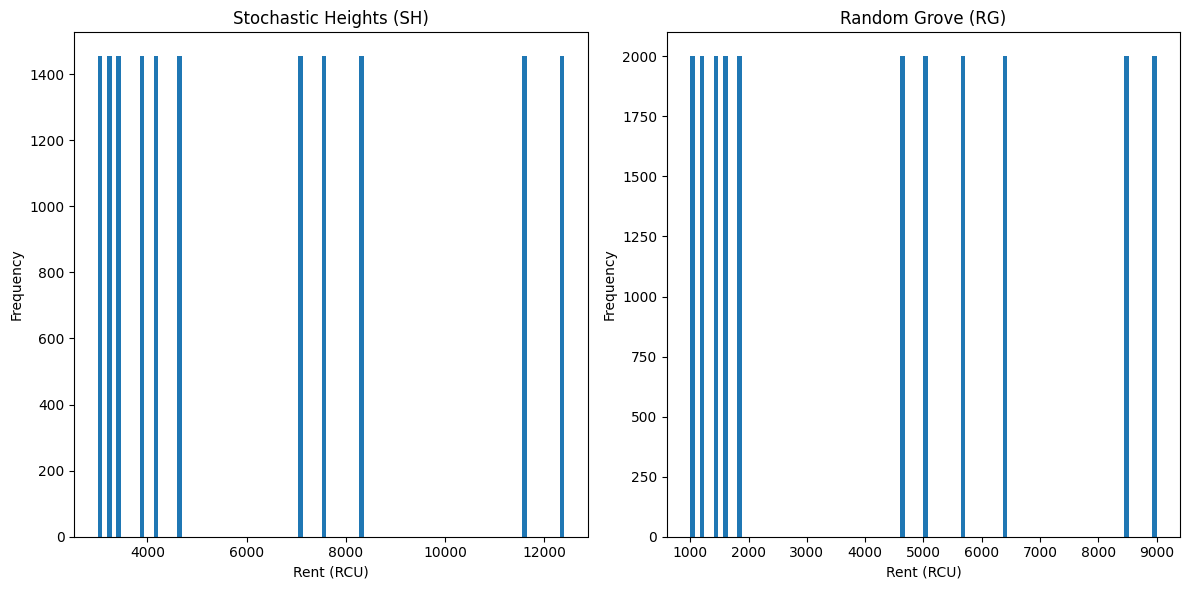

Stochastic Heights Median: 4600.0. Mean: 6300.0. IRQ:4900.0. Var:10327272.7
Random Grove Median: 4600.0. Mean: 4200.0. IRQ:5000.0. Var:8092727.3


In [8]:
# Generate synthetic data for Scenario 3
sh3_prices = np.array([3000,3200,3400,3900,4200,4600,7100,7600,8300,11600,12400]*int(population_sh/11))
rg3_prices = np.array([1000,1200,1400,1600,1800,4600,5000,5700,6400,8500,9000]*int(population_rg/11))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sh3_prices, bins=n_bins)
plt.title('Stochastic Heights (SH)')
plt.xlabel('Rent (RCU)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(rg3_prices, bins=n_bins)
plt.title('Random Grove (RG)')
plt.xlabel('Rent (RCU)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Q3,Q1=np.percentile(sh3_prices,(75,25))
sh3_iqr = Q3-Q1
Q3,Q1=np.percentile(rg3_prices,(75,25))
rg3_iqr = Q3-Q1

print(f'Stochastic Heights Median: {np.median(sh3_prices)}. Mean: {np.mean(sh3_prices)}. IRQ:{sh3_iqr}. Var:{round(np.var(sh3_prices),1)}')
print(f'Random Grove Median: {np.median(rg3_prices)}. Mean: {np.mean(rg3_prices)}. IRQ:{rg3_iqr}. Var:{round(np.var(rg3_prices),1)}')

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that $X$ is a vector of counts.


2. Consider the random variable $Y = X_2 + X_3 + X_4$.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to results from class and explain your observation.

In [35]:
exp_num = 100
p_arr = np.array([0.2, 0.1, 0.1, 0.1, 0.2, 0.3])
n = 20
#Gnerated the experiments using random multinomial
experiment = np.random.multinomial(n, p_arr, exp_num)

#Create an array of the sum of X1, X2, X3 in every experiment
y_array = np.sum(experiment[:, 1:4], axis=1).tolist()

emp_moment = moment(y_array, moment = 3)
#gamma_3 = np(1-p)(1-2p) where p=p_Y
p_y = np.sum(p_arr[1:4])
bin_moment = n*p_y*(1-p_y)*(1-2*p_y)

print(f'The empirical centralized third moment of 𝑌: {round(emp_moment, 5)}\n')
print(f'The third moment of 𝑌 results from class: {round(bin_moment, 5)}\n')


The empirical centralized third moment of 𝑌: 1.77797

The third moment of 𝑌 results from class: 1.68



A distinction exists between the theoretical and empirical centralized third moments. The former relates to the distribution, while the latter, derived from samples, is calculated using a specific formula. The mean, based on sample data, differs from the theoretical mean. As the number of experiments increases, the two values gradually converge, aligning empirical results more closely with theoretical expectations.

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [36]:
def NFoldConv(P , n):
    ### P is a diatribution of a random variable and n is an integer.
    ### the function returns Q, the sum of n independent repeats of random variables
       
    assert sum(P.pk) == 1, "Input P must be a valid probability distribution."

    pmf_P = P.pmf(np.arange(P.a, P.b+1))
    x_vals = np.arange(P.a*n, P.b*n+1)
    P_vals = pmf_P
    # Perform n-fold convolution
    for i in range(n-1):
        P_vals = np.convolve(P_vals, pmf_P)
    
    Q = rv_discrete(values=(x_vals, P_vals)) 
    return Q 


#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 independent times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


Text(0.5, 1.0, 'Distribution of the sum of the results of rolling a fair octahedron 17 independent times')

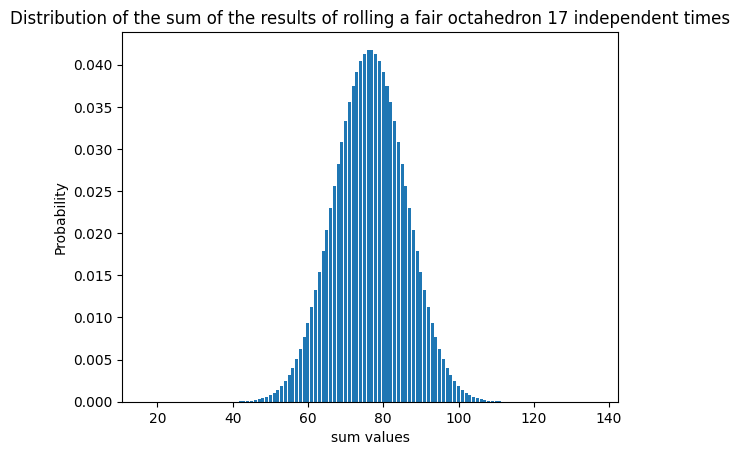

In [11]:
n=17
P = rv_discrete(values=([1,2,3,4,5,6,7,8],[1/8 for i in range(8)]))
Q = NFoldConv(P, n)

plt.bar(Q.xk, Q.pk)
plt.xlabel(f'sum values')
plt.ylabel(f'Probability')
plt.title(f'Distribution of the sum of the results of rolling a fair octahedron {n} independent times')

### Question 5 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 5.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

The distribution which is described above is known as the binomial distribution, wherein each individual flip represents a Bernoulli trial.

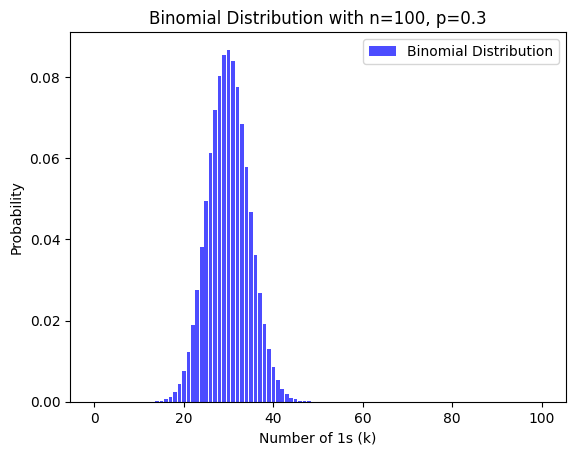

In [5]:
n = 100
p = 0.3

k_values = np.arange(0, n+1)
probabilities = binom.pmf(k_values, n, p)

plt.bar(k_values, probabilities, color='blue', alpha=0.7, label='Binomial Distribution')
plt.title(f'Binomial Distribution with n={n}, p={p}')
plt.xlabel('Number of 1s (k)')
plt.ylabel('Probability')
plt.legend()
plt.show()

#### 5.B
State a formula for computing $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

The probability mass function for binom is: $n \choose i$ $\cdot p^i(1-p)^{n-i}$

Hence,The expected value of C - the amount of events that we receive for each sumation option is calculated as following:

$E(c) = \sum \limits _{i=0} ^{n} p^i \cdot (1-p)^{n-i} (\frac{n!}{i!(n-i)!})^2$ 

In [7]:
def calculate_expected_c(n,p):
    E_C = 0
    for i in range(0,n+1):
        E_C+= (pow(p,i))*(pow(1-p,n-i))*(pow((np.math.factorial(n))/(np.math.factorial(i)*np.math.factorial(n-i)),2))
    return E_C

# Values for p and n
p_values = [0.1, 0.5, 0.8]
n_values = [10, 20, 50, 100]

for p in p_values:
    for n in n_values:
        expected_c = calculate_expected_c(n, p)
        print(f'E(C) for p={p}, n={n}: {expected_c:.4f}')

E(C) for p=0.1, n=10: 22.5760
E(C) for p=0.1, n=20: 1757.7458
E(C) for p=0.1, n=50: 1479309659.7732
E(C) for p=0.1, n=100: 16815694309212346368.0000
E(C) for p=0.5, n=10: 180.4258
E(C) for p=0.5, n=20: 131460.6941
E(C) for p=0.5, n=50: 89609514959900.0312
E(C) for p=0.5, n=100: 71430183238031670880378028032.0000
E(C) for p=0.8, n=10: 66.9500
E(C) for p=0.8, n=20: 16979.4321
E(C) for p=0.8, n=50: 490151964857.8016
E(C) for p=0.8, n=100: 2013008191527897998032896.0000


#### 5.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

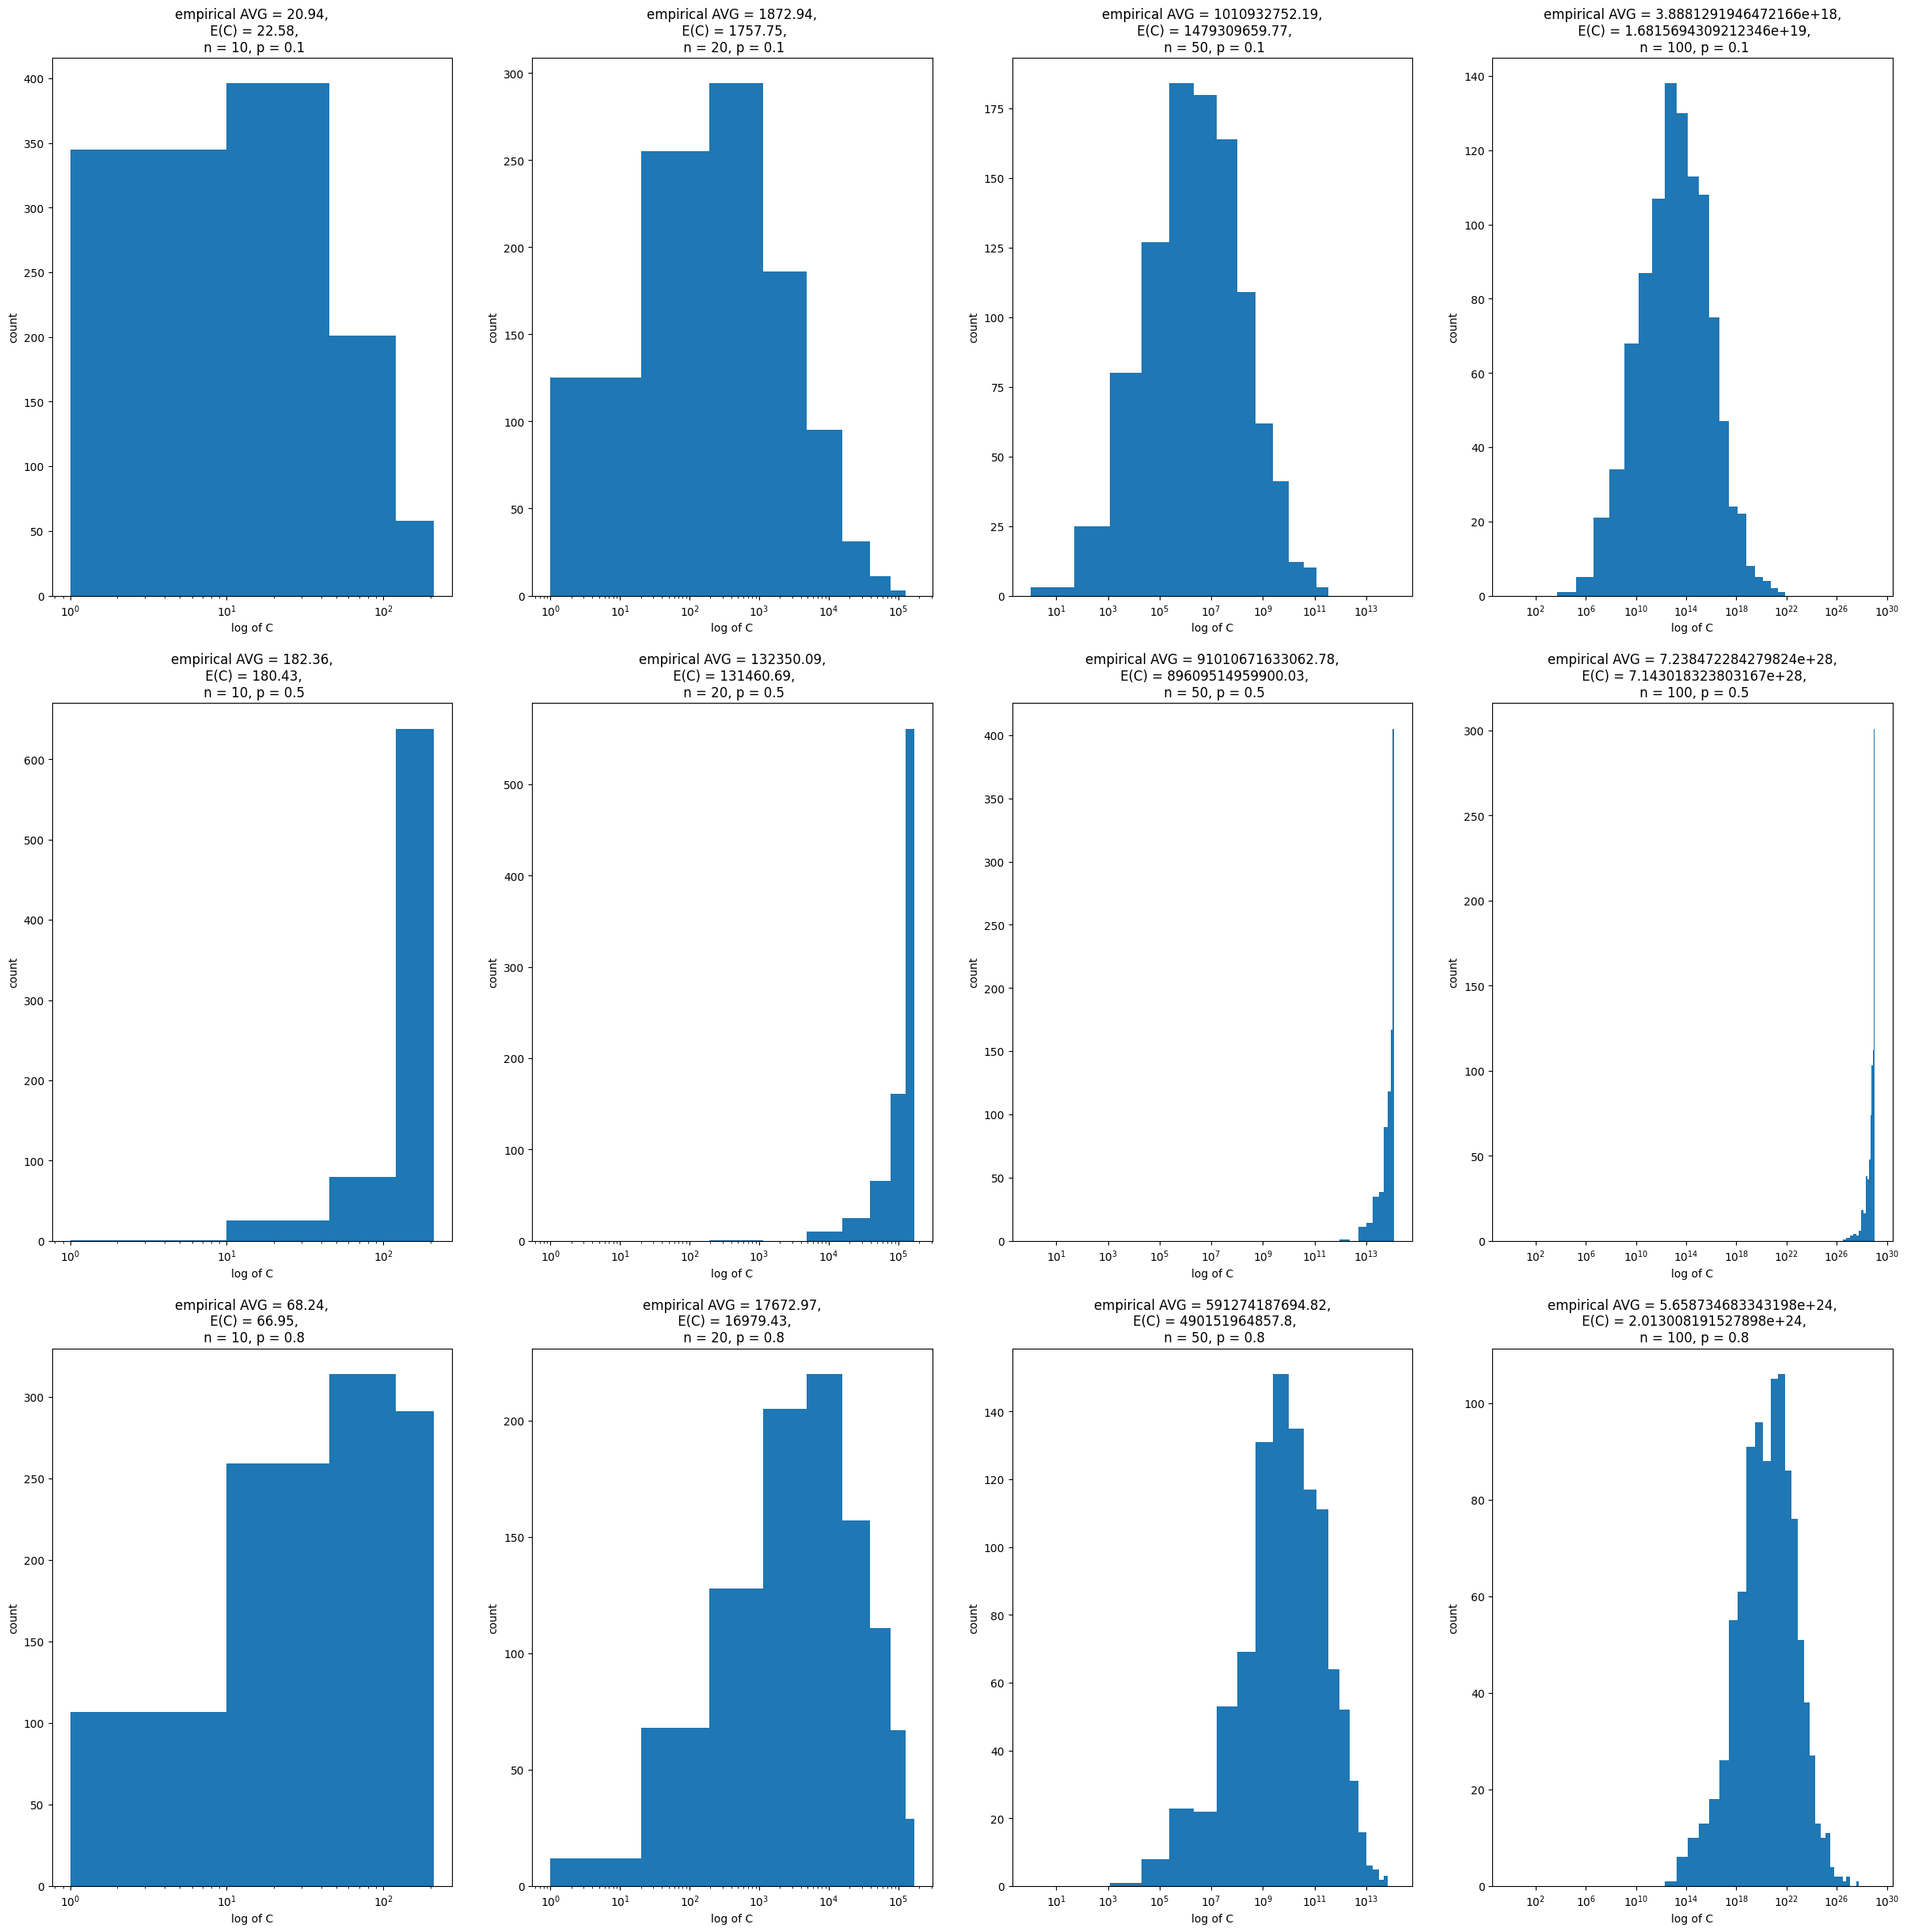

In [69]:
def c_values(n,p, num_samples):
    samples = np.random.binomial(n, p, num_samples)
    c_results = []
    for i in range(num_samples):
        c_results.append(np.math.factorial(n) / (np.math.factorial(samples[i]) * np.math.factorial(n - samples[i])))
    
    return c_results

n = [10, 20, 50, 100]
p = [0.1, 0.5, 0.8]
num_samples = 1000

figure, axis = plt.subplots(3, 4, figsize=(30,30))

for i in range(len(p)):
    for j in range(len(n)):
        x = c_values(n[j],p[i], num_samples)
        axis[i,j].hist(x
                       ,bins = [(np.math.factorial(n[j]))/(np.math.factorial(k)*np.math.factorial(n[j]-k)) for k in range(int(n[j]/2))])

        axis[i,j].set_title(f'empirical AVG = {round(np.mean(x),2)},\n E(C) = {round(calculate_expected_c(n[j], p[i]),2)},\n n = {n[j]}, p = {p[i]}')
        axis[i,j].set_xscale('log')
        axis[i,j].set_xlabel(f'log of C')
        axis[i,j].set_ylabel(f'count')
       
        

#### 5.D
Use a scatter plot to compare the empirical and the computed values from the previous section.

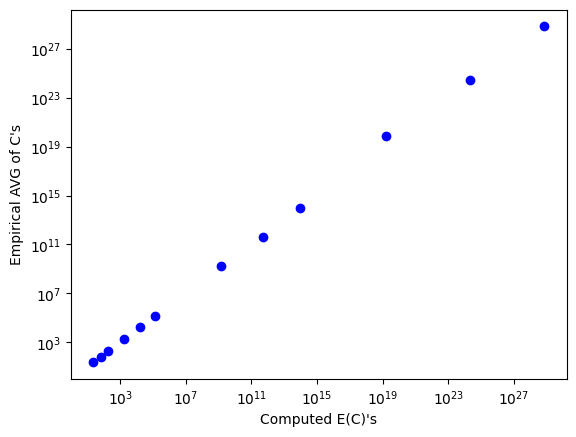

In [74]:

n = [10, 20, 50, 100]
p = [0.1, 0.5, 0.8]
num_samples = 1000


for i in range(len(p)):
    for j in range(len(n)):
        plt.scatter(calculate_expected_c(n[j], p[i]),np.mean(c_values(n[j],p[i], num_samples)), color = 'b')

plt.xlabel("Computed E(C)'s")
plt.ylabel("Empirical AVG of C's")
plt.xscale('log')
plt.yscale('log')
plt.show()

### Question 6 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 6.A
Write code to compute the exact value of $E(T_{N})$

In [12]:
def expected_waiting_time_coupon_collector(n):
    return n * np.sum([(1/i) for i in range(1, n+1)])

print(expected_waiting_time_coupon_collector(100))

518.737751763962


#### 6.B
Write code to compute the exact value of $V(T_{N})$

In [13]:
def variance_waiting_time_coupon_collector(n):
    return n**2 * np.sum([(1/(i**2)) for i in range(1, n+1)]) - expected_waiting_time_coupon_collector(n)

print(variance_waiting_time_coupon_collector(100))

15831.10125008497


#### 6.C
Write code to exactly compute $P(T_{30}>60)$

In [33]:
def comp_prob_grater_than(N, k):
    if k==1:
        return 1    
    
    
    p_val = np.zeros((N+1, k+1))
    p_val[1][1] = 1

    for i in range(2,N+1):
        p_g = geom.pmf(1, (N - i + 1) / N)
        for j in range(1, k+1):
            p_val[i][j] = p_val[i][j-1] * (1 - p_g) + p_val[i-1][j-1] * p_g

    return np.sum([p_val[N][:]])

N = 100
k = 718
    
print(1-comp_prob_grater_than(N,k))

0.07103111931541684


#### 6.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Compute $E(S_{60})$ - the expected value of the time it will take to observe $N/2=60/2=30$ from the total of $N=60$ coupon types

In [31]:
def expected_waiting_time_coupon_collector(n):
    return n * np.sum([(1/(n-i+1)) for i in range(1, int(n/2)+1)])

print(expected_waiting_time_coupon_collector(60))

41.092996921880804


#### 6.E
Write code to exactly compute $P(S_{60}>60)$

In [38]:
def comp_prob_grater_than(N, k):
    if k==1:
        return 1    
    
    
    p_val = np.zeros((N+1, k+1))
    p_val[1][1] = 1

    for i in range(2,int(N/2)+1):
        p_g = geom.pmf(1, (N - i + 1) / N)
        for j in range(1, k+1):
            p_val[i][j] = p_val[i][j-1] * (1 - p_g) + p_val[i-1][j-1] * p_g

    return np.sum([p_val[int(N/2)][:]])

N = 60
k = 60
    
print(1- comp_prob_grater_than(N,k))

0.00017216506473594073
